In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def eBL(L,beta=1,s=5000):
    """
    Return approximate matrix exponential of L"""
    return np.linalg.matrix_power(np.eye(L.shape[0])+beta*L/s,s)

def rbf(X1,X2,l=1.0):
    """RBF covariance between x1 and x2, lengthscale l
    X1 and X2 are N1x1 and N2x1 matrices. Returns N1xN2 matrix of covariances"""
    assert len(X1.shape)==2
    assert len(X2.shape)==2
    assert X1.shape[1]==1
    assert X2.shape[1]==1
    return np.exp(-(X1-X2.T)**2/(2*l**2))
   
def buildL(N,W):
    L = []
    for i,(n,w) in enumerate(zip(N,W)):
        Lrow = np.zeros(len(N))
        Lrow[n]=w
        Lrow[i] = -np.sum(Lrow)
        L.append(Lrow)
    return np.array(L)

def buildstraightlinenetwork(num=10,w=1):
    N = [[1]]
    W = [[w]]
    for i in range(1,num-1):
        N.append([i-1,i+1])
        W.append([w,w])
    N.append([num-2])
    W.append([w])
    return N,W

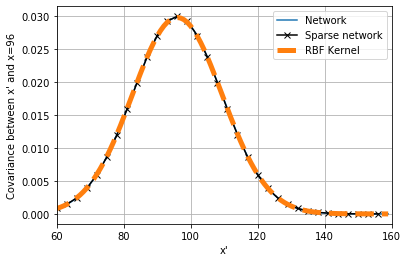

In [20]:
#network
beta = 90
N,W = buildstraightlinenetwork(160,1)
L = buildL(N,W)
step = 3
ratio = 1/(step**2)
Nsparse,Wsparse = buildstraightlinenetwork(int(160/step),ratio)
Lsparse = buildL(Nsparse,Wsparse)
X = np.arange(len(L))
cov = eBL(L,beta=beta)
plt.plot(X,cov[:,96],label="Network")
Xsparse = step*np.arange(len(Lsparse))
covsparse = eBL(Lsparse,beta=beta)

#I'M HAVING TO NORMALISE THIS... WHICH NEEDS THINKING ABOUT!
#covsparse = covsparse*np.sum(cov[:,96])/np.sum(covsparse[:,int(96/step)])/step
plt.plot(Xsparse,covsparse[:,int(96/step)]/step,'k-x',label="Sparse network")
plt.xlim([60,160])

#From textbook we can see that the lengthscale is equivalent to sqrt(beta*2), see text around eq 1.3 and 1.4?
rbfvals = rbf(np.array([[96]]),X[:,None],np.sqrt(beta*2))[0,:]
rbfvals/=np.sum(rbfvals)
plt.plot(X,rbfvals,'--',lw=5,label="RBF Kernel")
plt.legend()
plt.ylabel('Covariance between x\' and x=96')
plt.xlabel('x\'')
plt.grid()

In [10]:
np.max(covsparse[:,int(96/step)])/np.max(cov[:,96])

6.168101997427148

In [12]:
L

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -1.]])

In [21]:
covsparse[:,int(96/step)]

array([1.78558849e-11, 4.97766761e-11, 1.65742926e-10, 5.46663044e-10,
       1.75507329e-09, 5.47382105e-09, 1.65712422e-08, 4.86595593e-08,
       1.38484439e-07, 3.81691842e-07, 1.01800807e-06, 2.62513247e-06,
       6.53937186e-06, 1.57223316e-05, 3.64496886e-05, 8.14058582e-05,
       1.74977234e-04, 3.61611191e-04, 7.17794104e-04, 1.36714269e-03,
       2.49597062e-03, 4.36348101e-03, 7.29718511e-03, 1.16620688e-02,
       1.77941285e-02, 2.58976788e-02, 3.59215667e-02, 4.74481119e-02,
       5.96415455e-02, 7.12995315e-02, 8.10259692e-02, 8.75001843e-02,
       8.97733979e-02, 8.75001843e-02, 8.10259692e-02, 7.12995315e-02,
       5.96415455e-02, 4.74481119e-02, 3.59215667e-02, 2.58976788e-02,
       1.77941285e-02, 1.16620688e-02, 7.29718516e-03, 4.36348117e-03,
       2.49597116e-03, 1.36714445e-03, 7.17799578e-04, 3.61627762e-04,
       1.75025893e-04, 8.15443426e-05, 3.68313805e-05, 1.67403397e-05,
       9.16450433e-06])

In [24]:
np.diag(Lsparse)

array([-0.11111111, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
       -0.22222222, -0.22222222, -0.11111111])